# Computer Vision
![title](data/cv_heading.jfif)
### In this tutorial, we are going to learn how to take a photo with a webcam attached to our Pynq Board, display this image in our Jupyter Notebook, and then detect faces in the photo. For extra credit, we will use a neural net to predict the objects in a photo.

## What is Computer Vision?

Computer vision is a field of artificial intelligence (AI) that enables computers and systems to derive meaningful information from digital images, videos and other visual inputs — and take actions or make recommendations based on that information. If AI enables computers to think, computer vision enables them to see, observe and understand.

Computer vision works much the same as human vision, except humans have a head start. Human sight has the advantage of lifetimes of context to train how to tell objects apart, how far away they are, whether they are moving and whether there is something wrong in an image.

Computer vision trains machines to perform these functions, but it has to do it in much less time with cameras, data and algorithms rather than retinas, optic nerves and a visual cortex. Source [https://www.ibm.com/topics/computer-vision]

Examples of Computer Vision:
1. Self-driving cars. Ex: Tesla ![alt text](data/cv_tesla.png)
2. Irrigation management ![alt text](data/cv_irrigation.jfif)
3. Plant monitoring ![alt text](data/cv_plant_monitoring.jpg)
4. Mask detection (Pandemic) ![alt text](data/cv_mask.jpg)
5. Monitoring social distancing ![alt text](data/cv_social_distance.jpg)
6. List goes on and on........


## Part 1: Setup

### 1.1 Load Overlay
Our PYNQ Board has a Field Programmable Gate Array (FPGA) on it that must be programmed before we begin using the board. We apply designs called overlays that we can design however we want. For the first part of this tutorial, we are going to use the pre-built base overlay.

In [1]:
from pynq.overlays.base import BaseOverlay
from pynq.lib.video import *
base = BaseOverlay("base.bit")

### 1.2 Import Libraries
Here we tell the board what libraries we want to use in our project.

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from IPython import display

### 1.3 Initialize Webcam
After plugging in our USB webcam, we must tell the board what size images it is going to be recording and sending to the board. We also need to create a python object that will store the images we read from the webcam.

In [3]:
#create object
videoIn = cv2.VideoCapture(0)

#set input width and height
input_frame_width = 640
input_frame_height = 480
videoIn.set(cv2.CAP_PROP_FRAME_WIDTH, input_frame_width);
videoIn.set(cv2.CAP_PROP_FRAME_HEIGHT, input_frame_height);

#check to ensure the webcam is open
if(videoIn.isOpened()):
    print('camera is ready')
else:
    print('error starting camera, run this cell again')

camera is ready


## Part 2: Face Detection

### 2.1 Take Photo
Once we have our board setup and webcam working, it is time to use it! using videoIn.read(), we can read what the webcam is looking at at any given moment. This function has two return values. The first tells us if we successfully read an image or not. True means we did, false means there was a problem. The second return value is a frame object, which is the actual image we read.

In [4]:
#read frame
success, frame = videoIn.read()
#if there was an error, tell us!
if (success != True):
    print("Video Read Error")

### 2.2 Display Photo
Using matplotlib imported earlier, we can display our image right in our Jupyter notebook

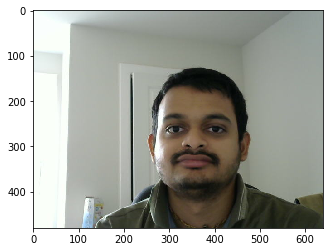

In [5]:
#display input
plt.imshow(frame[:,:,[2,1,0]])
plt.show()

### 2.3 Look for Faces
Now that we can take a photo, let's have our board look for faces in our photo. We are going to use something called a Haar Cascade Classifier. This is a model that has been training to understand what a face looks like. It has already been built and trained, so we simply need to load it and pass our image to it. Below is what the model is looking for when it tries to find faces, can you trick it?
![HaarClassifier](data/haar.jpg)

#### A little more on Haar Classifier: 
It is an Object Detection Algorithm used to identify faces in an image or a real time video. The algorithm uses edge or line detection features. The algorithm is given a lot of positive images consisting of faces, and a lot of negative images not consisting of any face to train on them. 

![HaarClassifier](data/cv_haar_gif.gif)

Image source: https://towardsdatascience.com/face-detection-with-haar-cascade-727f68dafd08 

In [7]:
#create our own instance of the classifier
face_cascade = cv2.CascadeClassifier(
    '/home/xilinx/jupyter_notebooks/base/video/data/'
    'haarcascade_frontalface_default.xml')

#our classifier prefers to work on a gray image
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

#draw a rectangle around any faces we find
for (x,y,w,h) in faces:
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]

### 2.4 Show our image again with the face detection

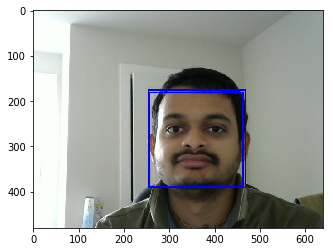

In [8]:
plt.imshow(frame[:,:,[2,1,0]])
plt.show()

### 2.5 Look for Eyes
The board also have another classifier for detecting features that look like eyes. We will do the same thing we did with the face classifier for the eye classifier.

In [9]:
#create our own instance of the classifier
eye_cascade = cv2.CascadeClassifier(
    '/home/xilinx/jupyter_notebooks/base/video/data/'
    'haarcascade_eye.xml')

eyes = eye_cascade.detectMultiScale(roi_gray)
for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

### 2.6 Show image with eye and face detection

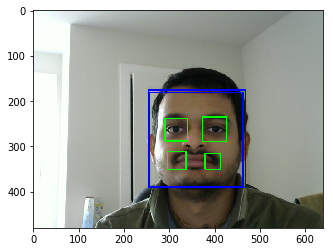

In [10]:
plt.imshow(frame[:,:,[2,1,0]])
plt.show()

### 2.7 Counting Faces
The faces our program found are contained in an array. This stores the location of the faces within the image. If we want to count the faces found in the image, we can simply print the length of this array.

In [11]:
print(len(faces))

1


## Part 3: Guess the object with a neural net

### Neural Netowork?! :)
![HaarClassifier](data/cv_nn.webp) 

Neural networks reflect the behavior of the human brain, allowing computer programs to recognize patterns and solve common problems in the fields of Artificial Intelligence (AI), machine learning, and deep learning.
Also known as artificial neural networks (ANNs) or simulated neural networks (SNNs). Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another.

Artificial neural networks (ANNs) are comprised of a node layers, containing an input layer, one or more hidden layers, and an output layer. Each node, or artificial neuron, connects to another and has an associated weight and threshold. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network.



### 3.1 Import a Neural Network

In [12]:
! sudo pip3 install git+https://github.com/Xilinx/QNN-MO-PYNQ.git

  Cloning https://github.com/Xilinx/QNN-MO-PYNQ.git to /tmp/pip-wkig29ni-build


In [13]:
import qnn
from qnn import Dorefanet
from qnn import utils
import os, pickle, random
from PIL import Image

### 3.2 Take Another Image

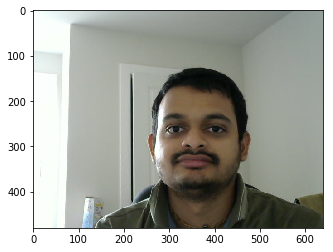

In [14]:
success, frame2 = videoIn.read()

#if there was an error, tell us!
if (success != True):
    print("Video Read Error")
    
#display the image
plt.imshow(frame2[:,:,[2,1,0]])
plt.show()   

#save the image just taken to memory
cv2.imwrite("photo.jpg", frame2)

videoIn.release()

### 3.3 Set Up the Object Classifier
This classifier has been trained to recognize a wide variety of objects. It requires us to reconfigure the FPGA on the board (replacing the base overlay with a custom overlay that will help accelerate the classification). This is automatically done with the init_accelerator() function

In [15]:
classifier = Dorefanet()
classifier.init_accelerator()
net = classifier.load_network(json_layer="/usr/local/lib/python3.6/dist-packages/qnn/params/dorefanet-layers.json")

conv0_weights = np.load('/usr/local/lib/python3.6/dist-packages/qnn/params/dorefanet-conv0.npy', encoding="latin1").item()
fc_weights = np.load('/usr/local/lib/python3.6/dist-packages/qnn/params/dorefanet-fc-normalized.npy', encoding='latin1').item()

with open("/home/xilinx/jupyter_notebooks/qnn/imagenet-classes.pkl", 'rb') as f:
    classes = pickle.load(f)
    names = dict((k, classes[k][1].split(',')[0]) for k in classes.keys())
    synsets = dict((classes[k][0], classes[k][1].split(',')[0]) for k in classes.keys())
    
conv0_W = conv0_weights['conv0/W']
conv0_T = conv0_weights['conv0/T']

### 3.4 Run the Image through the Classifier
Once our classifier is set up, we input our image to the neural net.

In [16]:
img, img_class = classifier.load_image("photo.jpg")

# 1st convolutional layer execution, having as input the image and the trained parameters (weights)
conv0 = utils.conv_layer(img, conv0_W, stride=4)
# The result in then quantized to 2 bits representation for the subsequent HW offload
conv0 = utils.threshold(conv0, conv0_T)


# Compute offloaded convolutional layers
out_dim = net['merge4']['output_dim']
out_ch = net['merge4']['output_channels']

conv_output = classifier.get_accel_buffer(out_ch, out_dim);
conv_input = classifier.prepare_buffer(conv0)

classifier.inference(conv_input, conv_output)

conv_output = classifier.postprocess_buffer(conv_output)


# Normalize results
fc_input = conv_output / np.max(conv_output)

# FC Layer 0
fc0_W = fc_weights['fc0/Wn']
fc0_b = fc_weights['fc0/bn']

fc0_out = utils.fully_connected(fc_input, fc0_W, fc0_b)
fc0_out = utils.qrelu(fc0_out)
fc0_out = utils.quantize(fc0_out, 2)

# FC Layer 1
fc1_W = fc_weights['fc1/Wn']
fc1_b = fc_weights['fc1/bn']

fc1_out = utils.fully_connected(fc0_out, fc1_W, fc1_b)
fc1_out = utils.qrelu(fc1_out)

# FC Layer 2
fct_W = fc_weights['fct/W']
fct_b = np.zeros((fct_W.shape[1], ))

fct_out = utils.fully_connected(fc1_out, fct_W, fct_b)

### 3.5 Use Softmax to Estimate the Probability of the Top 5 Most Likely Classes

class:             bow tie	probability:  31.71%
class:            lipstick	probability:  18.05%
class:           seat belt	probability:  12.78%
class:            lab coat	probability:   4.32%
class:          shower cap	probability:   3.81%


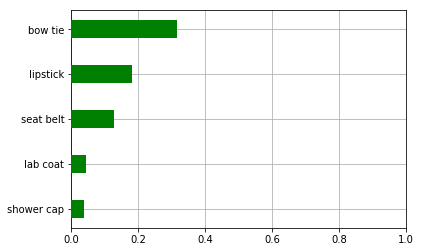

In [17]:
# Softmax
out = utils.softmax(fct_out)

# Top-5 results
topn =  utils.get_topn_indexes(out, 5)  
for k in topn: print("class:{0:>20}\tprobability:{1:>8.2%}".format(names[k].lower(), out[k]))

#display results
x_pos = np.arange(len(topn))
plt.barh(x_pos, out[topn], height=0.4, color='g', zorder=3)
plt.yticks(x_pos, [names[k] for k in topn])
plt.gca().invert_yaxis()
plt.xlim([0,1])
plt.grid(zorder=0)
plt.show()